In [4]:
!pip install -U control

import numpy as np
import matplotlib.pyplot as plt
import control as co
import pandas as pd
from operator import truediv
from sklearn.metrics import r2_score, mean_squared_error

Requirement already up-to-date: control in /usr/local/lib/python3.7/dist-packages (0.9.0)


# Validação da resposta do Maestro x Python

In [5]:
plt.rcParams["figure.figsize"] = (18,18)
plt.rcParams["font.size"] = (16)

In [ ]:
data = pd.read_csv('/content/sd.csv', encoding='latin-1', sep=';', decimal=",")

date = data.columns[0]
data.rename(columns={date: 'data_log'}, inplace = True )

In [7]:
df = data

indexNames = (df[df['step.out'] != 1]).index
df.drop(indexNames, inplace=True)
df = df.reset_index(drop=True)

In [8]:
s = co.tf('s')

nums_gas = [0.767, 0.134, 0.135, 0.190]
nums_feeder = [0, -0.223, -0.165, -0.172]
nums_fluidflowrate = [-0.016, 0.004, 0.004, 0.008]

den_gas = [(253*s+1), (150*s+1)*(153*s+1), (73*s+1)*(70*s+1), (59*s+1)*(60*s+1)]
den_feeder = [(0.0001*s+1), (122*s+1)*(117*s+1), (187*s+1)*(38*s+1), (198*s+1)*(197*s+1)]
den_fluidflowrate = [(100*s+1), (110*s+1)*(108*s+1), (61*s+1)*(60*s+1), (80*s+1)*(79*s+1)]

dt_gas = [10, 100, 20, 40]
dt_feeder = [0, 40, 20, 40]
dt_fluidflowrate = [20, 80, 40, 40]

g_gas = list(map(truediv, nums_gas, den_gas))
g_feeder = list(map(truediv, nums_feeder, den_feeder))
g_fluidflowrate = list(map(truediv, nums_fluidflowrate, den_fluidflowrate))

dt_gas = pd.Series(dt_gas)
dt_feeder = pd.Series(dt_feeder)
dt_fluidflowrate = pd.Series(dt_fluidflowrate)

g_gas = pd.DataFrame(g_gas, columns = ["transfer function"])
g_feeder = pd.DataFrame(g_feeder, columns = ["transfer function"])
g_fluidflowrate = pd.DataFrame(g_fluidflowrate, columns = ["transfer function"])

g_gas['dead time'] = dt_gas
g_feeder['dead time'] = dt_feeder
g_fluidflowrate['dead time'] = dt_fluidflowrate

g_gas = np.array(g_gas)
g_feeder = np.array(g_feeder)
g_fluidflowrate = np.array(g_fluidflowrate)

,Erro Quadrático Médio,R2 Score,Nº de amostras
0,0.011329,0.996040,1801
1,0.004273,0.992137,1201
2,0.003375,0.994307,601
3,0.005583,0.994307,501


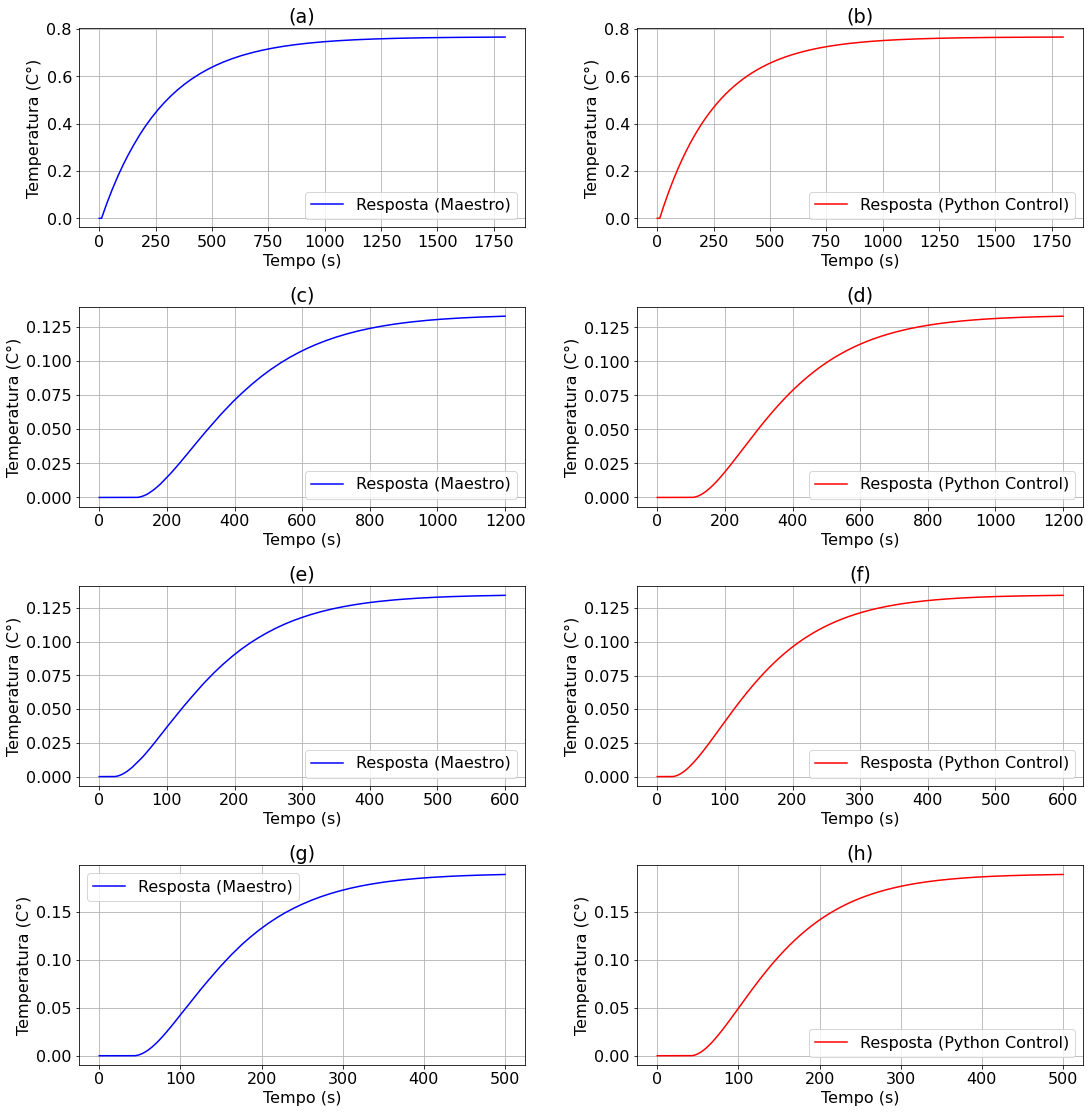

In [14]:
dt1 = g_gas[0][1]
dt2 = g_gas[1][1]
dt3 = g_gas[2][1]
dt4 = g_gas[3][1]

a1 = np.arange(start=0 , stop= 1800-dt1, step=1)
a2 = np.arange(start=0 , stop= 1200-dt2, step=1)
a3 = np.arange(start=0 , stop= 600-dt3, step=1)
a4 = np.arange(start=0 , stop= 500-dt4, step=1)

tf1 = g_gas[0][0]
tf2 = g_gas[1][0]
tf3 = g_gas[2][0]
tf4 = g_gas[3][0]

t1, y1 = co.step_response(tf1,a1)
t2, y2 = co.step_response(tf2,a2)
t3, y3 = co.step_response(tf3,a3)
t4, y4 = co.step_response(tf4,a4)

y1 = pd.Series((dt1+1)*[0]+y1.tolist())
y2 = pd.Series((dt2+1)*[0]+y2.tolist())
y3 = pd.Series((dt3+1)*[0]+y3.tolist())
y4 = pd.Series((dt4+1)*[0]+y4.tolist())

df = df.apply(pd.to_numeric, errors='coerce')

fig, axes = plt.subplots(nrows=4, ncols=2)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.4)

ax1 = df.loc[0:1800,'tfs_gas_temp_caixa.out1'].plot(
    ax=axes[0,0], 
    title='(a)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'blue')
ax1.legend(['Resposta (Maestro)'])

ax2 = y1.plot(
    ax=axes[0,1], 
    title='(b)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'red')
ax2.legend(['Resposta (Python Control)'])

ax3 = df.loc[0:1200,'tfs_gas_temp_cl.out1'].plot(
    ax=axes[1,0], 
    title='(c)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'blue')
ax3.legend(['Resposta (Maestro)'], loc=4)

ax4 = y2.plot(
    ax=axes[1,1], 
    title='(d)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'red')
ax4.legend(['Resposta (Python Control)'])

ax5 = df.loc[0:600,'tfs_gas_temp_entrada.out1'].plot(
    ax=axes[2,0], 
    title='(e)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'blue')
ax5.legend(['Resposta (Maestro)'])

ax6 = y3.plot(
    ax=axes[2,1], 
    title='(f)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'red')
ax6.legend(['Resposta (Python Control)'])

ax7 = df.loc[0:500,'tfs_gas_temp_saida.out1'].plot(
    ax=axes[3,0], 
    title='(g)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'blue')
ax7.legend(['Resposta (Maestro)'])

ax8 = y4.plot(
    ax=axes[3,1], 
    title='(h)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'red')
ax8.legend(['Resposta (Python Control)'])

y1_maestro = df.loc[0:1800,'tfs_gas_temp_caixa.out1']
y2_maestro = df.loc[0:1200,'tfs_gas_temp_cl.out1']
y3_maestro = df.loc[0:600,'tfs_gas_temp_entrada.out1']
y4_maestro = df.loc[0:500,'tfs_gas_temp_saida.out1']

rsme_y1_gas = mean_squared_error(y1, y1_maestro, squared=False)
rsme_y2_gas = mean_squared_error(y2, y2_maestro, squared=False)
rsme_y3_gas = mean_squared_error(y3, y3_maestro, squared=False)
rsme_y4_gas = mean_squared_error(y4, y4_maestro, squared=False)

r2_y1_gas = r2_score(y1, y1_maestro)
r2_y2_gas = r2_score(y2, y2_maestro)
r2_y3_gas = r2_score(y3, y3_maestro)
r2_y4_gas = r2_score(y4, y4_maestro)

data = {
    'Erro Quadrático Médio' : [rsme_y1_gas, rsme_y2_gas, rsme_y3_gas, rsme_y4_gas], 
    'R2 Score' : [r2_y1_gas, r2_y2_gas, r2_y3_gas, r2_y3_gas],
    'Nº de amostras' : [len(y1), len(y2), len(y3), len(y4)]
    }

ind_gas = pd.DataFrame(data)

ind_gas

,Erro Quadrático Médio,R2 Score,Nº de amostras
0,0.000000,1.000000,6
1,0.000036,0.993641,1001
2,0.000010,0.995465,1301
3,0.000021,0.995465,1501


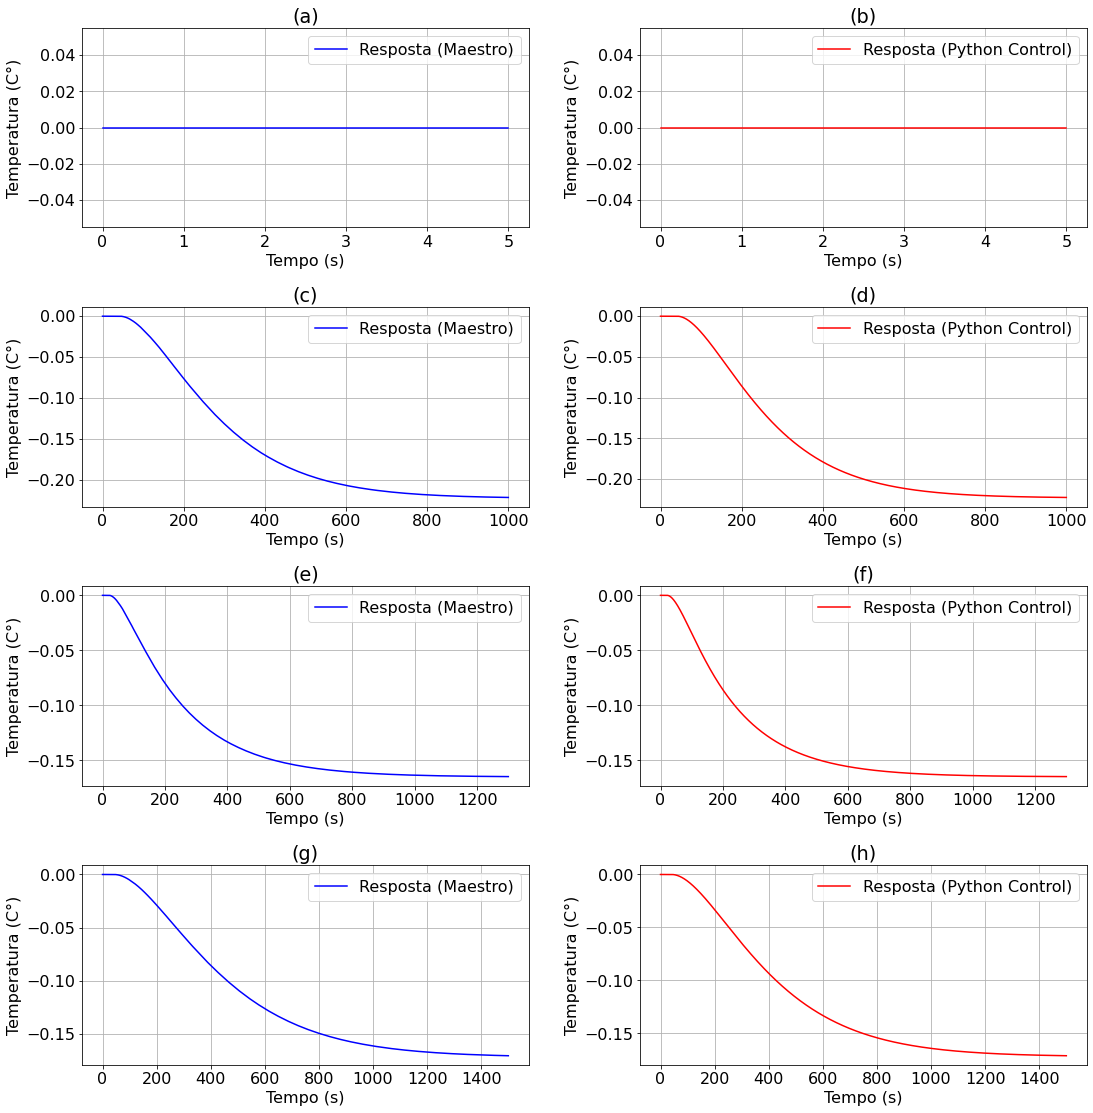

In [10]:
dt1 = g_feeder[0][1]
dt2 = g_feeder[1][1]
dt3 = g_feeder[2][1]
dt4 = g_feeder[3][1]

a1 = np.arange(start=0 , stop= 5-dt1, step=1)
a2 = np.arange(start=0 , stop= 1000-dt2, step=1)
a3 = np.arange(start=0 , stop= 1300-dt3, step=1)
a4 = np.arange(start=0 , stop= 1500-dt4, step=1)

tf1 = g_feeder[0][0]
tf2 = g_feeder[1][0]
tf3 = g_feeder[2][0]
tf4 = g_feeder[3][0]

t1, y1 = co.step_response(tf1,a1)
t2, y2 = co.step_response(tf2,a2)
t3, y3 = co.step_response(tf3,a3)
t4, y4 = co.step_response(tf4,a4)

y1 = pd.Series((dt1+1)*[0]+y1.tolist())
y2 = pd.Series((dt2+1)*[0]+y2.tolist())
y3 = pd.Series((dt3+1)*[0]+y3.tolist())
y4 = pd.Series((dt4+1)*[0]+y4.tolist())

fig, axes = plt.subplots(nrows=4, ncols=2)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.4)

ax1 = df.loc[0:5,'tfs_feeder_temp_caixa.out1'].plot(
    ax=axes[0,0], 
    title='(a)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'blue')
ax1.legend(['Resposta (Maestro)'])

ax2 = y1.plot(
    ax=axes[0,1], 
    title='(b)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'red')
ax2.legend(['Resposta (Python Control)'])

ax3 = df.loc[0:1000,'tfs_feeder_temp_cl.out1'].plot(
    ax=axes[1,0], 
    title='(c)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'blue')
ax3.legend(['Resposta (Maestro)'])

ax4 = y2.plot(
    ax=axes[1,1], 
    title='(d)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'red')
ax4.legend(['Resposta (Python Control)'])

ax5 = df.loc[0:1300,'tfs_feeder_temp_entrada.out1'].plot(
    ax=axes[2,0], 
    title='(e)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'blue')
ax5.legend(['Resposta (Maestro)'])

ax6 = y3.plot(
    ax=axes[2,1], 
    title='(f)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'red')
ax6.legend(['Resposta (Python Control)'])

ax7 = df.loc[0:1500,'tfs_feeder_temp_saida.out1'].plot(
    ax=axes[3,0], 
    title='(g)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'blue')
ax7.legend(['Resposta (Maestro)'])

ax8 = y4.plot(
    ax=axes[3,1], 
    title='(h)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'red')
ax8.legend(['Resposta (Python Control)'])

y1_maestro = df.loc[0:5,'tfs_feeder_temp_caixa.out1']
y2_maestro = df.loc[0:1000,'tfs_feeder_temp_cl.out1']
y3_maestro = df.loc[0:1300,'tfs_feeder_temp_entrada.out1']
y4_maestro = df.loc[0:1500,'tfs_feeder_temp_saida.out1']

rsme_y1_feeder = mean_squared_error(y1, y1_maestro)
rsme_y2_feeder = mean_squared_error(y2, y2_maestro)
rsme_y3_feeder = mean_squared_error(y3, y3_maestro)
rsme_y4_feeder = mean_squared_error(y4, y4_maestro)

r2_y1_feeder = r2_score(y1, y1_maestro)
r2_y2_feeder = r2_score(y2, y2_maestro)
r2_y3_feeder = r2_score(y3, y3_maestro)
r2_y4_feeder = r2_score(y4, y4_maestro)

data = {
    'Erro Quadrático Médio' : [rsme_y1_feeder, rsme_y2_feeder, rsme_y3_feeder, rsme_y4_feeder], 
    'R2 Score' : [r2_y1_feeder, r2_y2_feeder, r2_y3_feeder, r2_y3_feeder],
    'Nº de amostras' : [len(y1), len(y2), len(y3), len(y4)]
    }

ind_feeder = pd.DataFrame(data)

ind_feeder

,Erro Quadrático Médio,R2 Score,Nº de amostras
0,5.555340e-08,0.996726,801
1,1.462682e-08,0.992867,1001
2,1.165108e-08,0.994023,601
3,5.613191e-08,0.994023,601


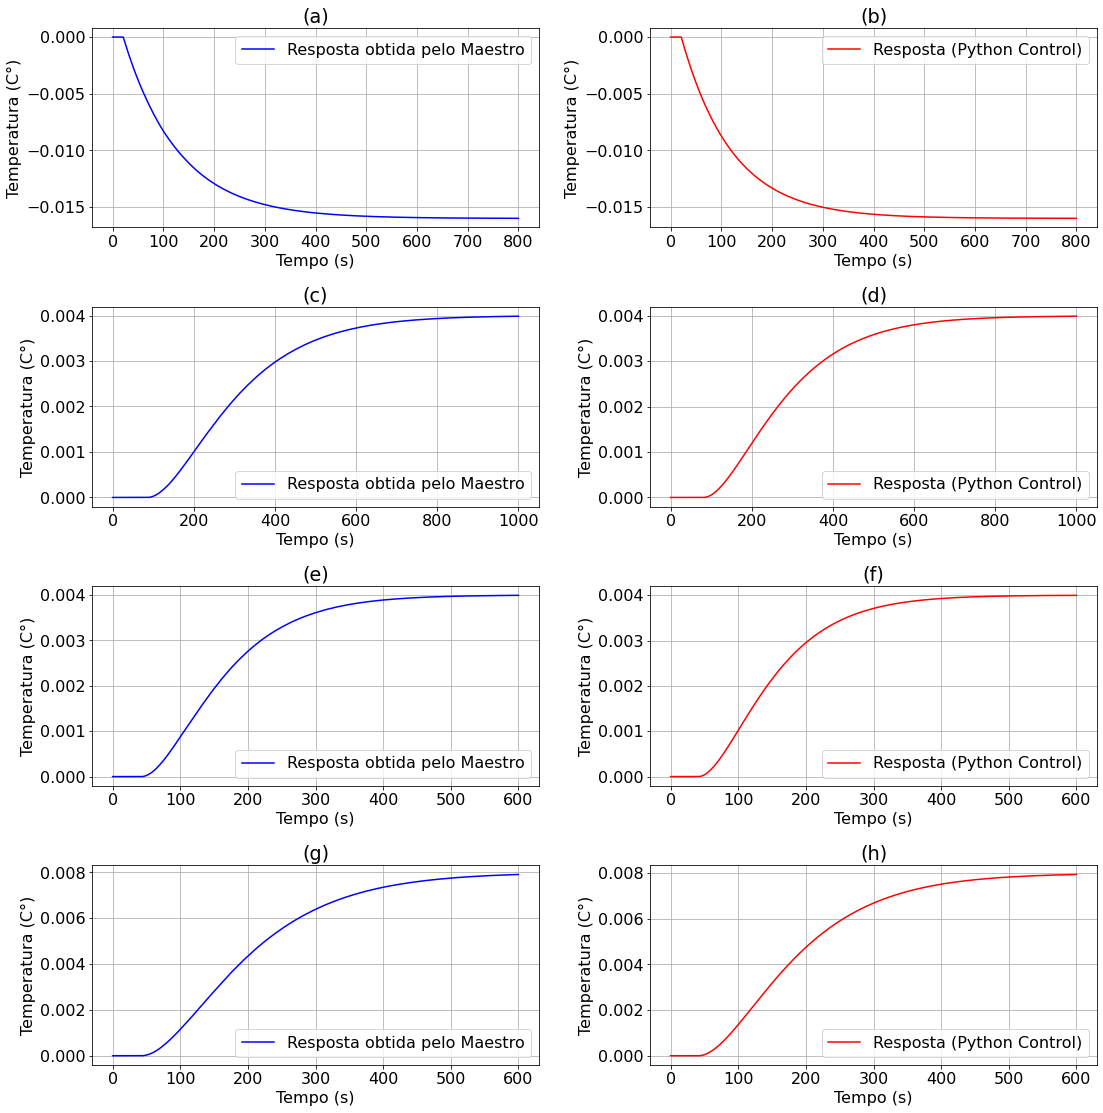

In [11]:
dt1 = g_fluidflowrate[0][1]
dt2 = g_fluidflowrate[1][1]
dt3 = g_fluidflowrate[2][1]
dt4 = g_fluidflowrate[3][1]

a1 = np.arange(start=0, stop= 800-dt1, step=1)
a2 = np.arange(start=0, stop= 1000-dt2, step=1)
a3 = np.arange(start=0, stop= 600-dt3, step=1)
a4 = np.arange(start=0, stop= 600-dt4, step=1)

tf1 = g_fluidflowrate[0][0]
tf2 = g_fluidflowrate[1][0]
tf3 = g_fluidflowrate[2][0]
tf4 = g_fluidflowrate[3][0]

t1, y1 = co.step_response(tf1,a1)
t2, y2 = co.step_response(tf2,a2)
t3, y3 = co.step_response(tf3,a3)
t4, y4 = co.step_response(tf4,a4)

y1 = pd.Series((dt1+1)*[0]+y1.tolist())
y2 = pd.Series((dt2+1)*[0]+y2.tolist())
y3 = pd.Series((dt3+1)*[0]+y3.tolist())
y4 = pd.Series((dt4+1)*[0]+y4.tolist())

fig, axes = plt.subplots(nrows=4, ncols=2)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.4)

ax1 = df.loc[0:800,'tfs_ve21_temp_caixa.out1'].plot(
    ax=axes[0,0], 
    title='(a)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'blue')
ax1.legend(['Resposta obtida pelo Maestro'])

ax2 = y1.plot(
    ax=axes[0,1], 
    title='(b)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'red')
ax2.legend(['Resposta (Python Control)'])

ax3 = df.loc[0:1000,'tfs_ve21_temp_cl.out1'].plot(
    ax=axes[1,0], 
    title='(c)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'blue')
ax3.legend(['Resposta obtida pelo Maestro'])

ax4 = y2.plot(
    ax=axes[1,1], 
    title='(d)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'red')
ax4.legend(['Resposta (Python Control)'])

ax5 = df.loc[0:600,'tfs_ve21_temp_entrada.out1'].plot(
    ax=axes[2,0], 
    title='(e)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'blue')
ax5.legend(['Resposta obtida pelo Maestro'])

ax6 = y3.plot(
    ax=axes[2,1], 
    title='(f)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'red')
ax6.legend(['Resposta (Python Control)'])

ax7 = df.loc[0:600,'tfs_ve21_temp_saida.out1'].plot(
    ax=axes[3,0], 
    title='(g)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'blue')
ax7.legend(['Resposta obtida pelo Maestro'])

ax8 = y4.plot(
    ax=axes[3,1], 
    title='(h)', 
    xlabel = 'Tempo (s)',
    ylabel = 'Temperatura (C°)',
    fontsize = 16,
    grid = True,
    color = 'red')
ax8.legend(['Resposta (Python Control)'])

y1_maestro = df.loc[0:800,'tfs_ve21_temp_caixa.out1']
y2_maestro = df.loc[0:1000,'tfs_ve21_temp_cl.out1']
y3_maestro = df.loc[0:600,'tfs_ve21_temp_entrada.out1']
y4_maestro = df.loc[0:600,'tfs_ve21_temp_saida.out1']

rsme_y1_fluidflowrate = mean_squared_error(y1, y1_maestro)
rsme_y2_fluidflowrate = mean_squared_error(y2, y2_maestro)
rsme_y3_fluidflowrate = mean_squared_error(y3, y3_maestro)
rsme_y4_fluidflowrate = mean_squared_error(y4, y4_maestro)

r2_y1_fluidflowrate = r2_score(y1, y1_maestro)
r2_y2_fluidflowrate = r2_score(y2, y2_maestro)
r2_y3_fluidflowrate = r2_score(y3, y3_maestro)
r2_y4_fluidflowrate = r2_score(y4, y4_maestro)

data = {
    'Erro Quadrático Médio' : [rsme_y1_fluidflowrate, rsme_y2_fluidflowrate, rsme_y3_fluidflowrate, rsme_y4_fluidflowrate], 
    'R2 Score' : [r2_y1_fluidflowrate, r2_y2_fluidflowrate, r2_y3_fluidflowrate, r2_y3_fluidflowrate],
    'Nº de amostras' : [len(y1), len(y2), len(y3), len(y4),]
    }

ind_fluidflowrate = pd.DataFrame(data)

ind_fluidflowrate

# Resposta das malhas após inserir os controladores